<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/IRC016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

In [ ]:
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print(f'Original dataset shape {X.shape}')
print(f'Original dataset samples per class {Counter(y)}')


# simulate the 2 last columns to be categorical features
X[:, -2:] = RandomState(10).randint(0, 4, size=(1000, 2))

print(X)
print(y)


sm = SMOTENC(random_state=42, categorical_features=[18, 19])
X_res, y_res = sm.fit_resample(X, y)
print(f'Resampled dataset samples per class {Counter(y_res)}')

print(X_res)
print(y_res)

Original dataset shape (1000, 20)
Original dataset samples per class Counter({1: 900, 0: 100})
[[ 0.60013068 -1.42766402 -0.8128431  ... -0.55302378  1.
   1.        ]
 [ 0.25364115 -1.45638734 -0.52259796 ...  1.69409346  0.
   3.        ]
 [ 0.18225579 -1.27960188  0.6780773  ... -0.81115113  0.
   1.        ]
 ...
 [-1.47024551  1.44291998 -0.61025173 ... -0.80856535  2.
   0.        ]
 [ 1.16080297  1.07930132 -0.10917057 ... -2.58494382  1.
   3.        ]
 [-0.29874435 -1.48144343 -0.34051766 ... -0.17772046  1.
   3.        ]]
[0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 

In [ ]:
from collections import Counter
import numpy as np
from imblearn.over_sampling import SMOTENC

rng = np.random.RandomState(42)
n_samples = 50
# Create a dataset of a mix of numerical and categorical data
X = np.empty((n_samples, 3), dtype=object)
X[:, 0] = rng.choice(["A", "B", "C"], size=n_samples).astype(object)
X[:, 1] = rng.randn(n_samples)
X[:, 2] = rng.randint(3, size=n_samples)
y = np.array([0] * 20 + [1] * 30)

print("The original imbalanced dataset")
print(sorted(Counter(y).items()))
print()
print("The first and last columns are containing categorical features:")
print(X[:5])
print()

smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print("Dataset after resampling:")
print(sorted(Counter(y_resampled).items()))
print()
print("SMOTE-NC will generate categories for the categorical features:")
print(X_resampled[-5:])
print()

The original imbalanced dataset
[(0, 20), (1, 30)]

The first and last columns are containing categorical features:
[['C' -0.14021849735700803 2]
 ['A' -0.033193400066544886 2]
 ['C' -0.7490765234433554 1]
 ['C' -0.7783820070908942 2]
 ['A' 0.948842857719016 2]]

Dataset after resampling:
[(0, 30), (1, 30)]

SMOTE-NC will generate categories for the categorical features:
[['A' 0.1989993778979113 2]
 ['B' -0.3657680728116921 2]
 ['B' 0.8790828729585258 2]
 ['B' 0.3710891618824609 2]
 ['B' 0.3327240726719727 2]]



In [ ]:
!wget https://archive.ics.uci.edu/static/public/350/data.csv

--2025-03-16 14:31:12--  https://archive.ics.uci.edu/static/public/350/data.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.csv.6’

data.csv.6              [   <=>              ]   2.76M  5.98MB/s    in 0.5s    

2025-03-16 14:31:13 (5.98 MB/s) - ‘data.csv.6’ saved [2897080]



In [ ]:
import sklearn
print(sklearn.__file__)
print(sklearn.__version__)
import pandas
print(pandas.__file__)
print(pandas.__version__)
import numpy
print(numpy.__file__)
print(numpy.__version__)

/usr/local/lib/python3.11/dist-packages/sklearn/__init__.py
1.6.1
/usr/local/lib/python3.11/dist-packages/pandas/__init__.py
2.2.2
/usr/local/lib/python3.11/dist-packages/numpy/__init__.py
1.26.4


In [ ]:
import pandas as pd  # 导入pandas库，用于数据处理
import numpy as np  # 导入numpy库，用于数值计算

# Preprocessing（预处理部分）
from sklearn.model_selection import train_test_split  # 导入train_test_split，用于划分训练集和测试集
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 导入StandardScaler和MinMaxScaler，用于数据标准化和归一化
from sklearn.decomposition import PCA  # 导入PCA，用于主成分分析（降维）
from imblearn.under_sampling import ClusterCentroids  # 导入ClusterCentroids，用于聚类中心欠采样
from imblearn.over_sampling import KMeansSMOTE, SMOTE  # 导入KMeansSMOTE和SMOTE，用于过采样（处理不平衡数据集）

# Classifiers（分类器部分）
from sklearn.linear_model import LogisticRegression  # 导入LogisticRegression，用于逻辑回归分类
from sklearn.svm import SVC  # 导入SVC，用于支持向量机分类
from sklearn import tree  # 导入tree，用于决策树相关
from pydotplus import graph_from_dot_data  # 导入graph_from_dot_data，用于可视化决策树
from sklearn.tree import DecisionTreeClassifier  # 导入DecisionTreeClassifier，用于决策树分类
from sklearn.ensemble import RandomForestClassifier  # 导入RandomForestClassifier，用于随机森林分类

# Metrics（评估指标部分）
from sklearn.model_selection import GridSearchCV  # 导入GridSearchCV，用于网格搜索（参数调优）
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix  # 导入各种评估指标
#from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve  # 导入绘制混淆矩阵和PR曲线的函数
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay # 导入绘制混淆矩阵和PR曲线

# Visualization（可视化部分）
import matplotlib  # 导入matplotlib库，用于绘图
import matplotlib.pyplot as plt  # 导入pyplot，用于绘制图表
import seaborn as sns  # 导入seaborn库，用于统计数据可视化
from scipy import stats  # 导入scipy.stats，用于统计计算

#%matplotlib inline  # 在Jupyter Notebook中显示图表
sns.set_style('darkgrid')  # 设置seaborn绘图风格为深色网格
random_state = 42  # 设置随机种子，保证结果可重复
import warnings  # 导入warnings库，用于处理警告
warnings.filterwarnings("ignore")  # 忽略警告信息

In [ ]:
# 读取并创建数据框
df = pd.read_csv('data.csv', index_col='ID')  # 从CSV文件读取数据，并将'ID'列设置为索引


df.rename(columns={'X1': 'LIMIT_BAL'}, inplace=True)
df.rename(columns={'X2': 'SEX'}, inplace=True)
df.rename(columns={'X3': 'EDUCATION'}, inplace=True)
df.rename(columns={'X4': 'MARRIAGE'}, inplace=True)
df.rename(columns={'X5': 'AGE'}, inplace=True)
df.rename(columns={'X6': 'PAY_1'}, inplace=True)
df.rename(columns={'X7': 'PAY_2'}, inplace=True)
df.rename(columns={'X8': 'PAY_3'}, inplace=True)
df.rename(columns={'X9': 'PAY_4'}, inplace=True)
df.rename(columns={'X10': 'PAY_5'}, inplace=True)
df.rename(columns={'X11': 'PAY_6'}, inplace=True)
df.rename(columns={'X12': 'BILL_AMT1'}, inplace=True)
df.rename(columns={'X13': 'BILL_AMT2'}, inplace=True)
df.rename(columns={'X14': 'BILL_AMT3'}, inplace=True)
df.rename(columns={'X15': 'BILL_AMT4'}, inplace=True)
df.rename(columns={'X16': 'BILL_AMT5'}, inplace=True)
df.rename(columns={'X17': 'BILL_AMT6'}, inplace=True)
df.rename(columns={'X18': 'PAY_AMT1'}, inplace=True)
df.rename(columns={'X19': 'PAY_AMT2'}, inplace=True)
df.rename(columns={'X20': 'PAY_AMT3'}, inplace=True)
df.rename(columns={'X21': 'PAY_AMT4'}, inplace=True)
df.rename(columns={'X22': 'PAY_AMT5'}, inplace=True)
df.rename(columns={'X23': 'PAY_AMT6'}, inplace=True)
df.rename(columns={'Y': 'DEFAULT'}, inplace=True)

df.head()  # 显示数据框的前几行

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   30000 

In [ ]:
print(f"Dataset size before:\t{df.shape[0]}")
df = df.drop(df[df['MARRIAGE']==0].index)
df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)
print(f"Dataset size after:\t{df.shape[0]}")


Dataset size before:	30000
Dataset size after:	29601


In [ ]:
df_copy = df.copy()
df_copy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
y = df_copy['DEFAULT']
X = df_copy.drop('DEFAULT', axis=1, inplace=False)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, random_state=24, stratify=y) # 使用train_test_split函数划分数据集，设置随机种子为24，并使用分层抽样（如果没有显式指定 test_size 或 train_size，train_test_split 函数会将数据集划分为 75% 的训练集和 25% 的测试集）

print('Training set shape: ', np.shape(X_train_raw)) # 打印训练集形状
print(f'- Defaulters:\t {len(y_train_raw[y_train_raw==1])}') # 打印训练集违约者数量
print(f'- Non-defaulters: {len(y_train_raw[y_train_raw==0])}') # 打印训练集非违约者数量
print('Test set shape: ', np.shape(X_test_raw)) # 打印测试集形状
print(f'- Defaulters:\t {len(y_test_raw[y_test_raw==1])}') # 打印测试集违约者数量
print(f'- Non-defaulters: {len(y_test_raw[y_test_raw==0])}') # 打印测试集非违约者数量



Training set shape:  (22200, 23)
- Defaulters:	 4954
- Non-defaulters: 17246
Test set shape:  (7401, 23)
- Defaulters:	 1651
- Non-defaulters: 5750


In [ ]:
X_train_raw.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
19912,310000,2,2,2,31,0,0,0,0,0,...,288581,294745,301286,306515,11900,12000,12500,12930,12000,13500
22361,180000,2,2,2,31,-2,-2,-2,-2,-2,...,12937,50500,0,0,2813,12937,50500,0,0,0
9780,150000,2,1,2,25,0,0,0,0,-1,...,147296,144927,54116,6072,5196,3171,3699,69245,1030,0
265,80000,2,1,2,37,-1,-1,-1,-1,-1,...,5986,188,1644,16872,258,5995,188,1644,16872,4000
5310,130000,1,2,2,38,0,0,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
26270,110000,2,2,1,41,0,0,0,0,0,...,98160,57257,54863,53510,5000,5045,7021,7000,5000,3000
8669,280000,2,2,2,35,0,0,0,0,0,...,154940,136894,138467,128473,7088,6107,5000,5057,5005,50012
12570,130000,1,2,1,49,0,0,0,0,0,...,100513,35288,34359,33488,5311,2502,1512,1612,2000,1000
307,500000,2,2,1,36,-1,-1,-1,-1,-1,...,0,8500,4590,0,23962,0,8500,4590,0,0


In [ ]:
!pip install plotly

[0]	train-logloss:0.47546	eval-logloss:0.49100
[1]	train-logloss:0.44666	eval-logloss:0.46919
[2]	train-logloss:0.42894	eval-logloss:0.45851
[3]	train-logloss:0.41558	eval-logloss:0.45212
[4]	train-logloss:0.40555	eval-logloss:0.44779
[5]	train-logloss:0.39794	eval-logloss:0.44570
[6]	train-logloss:0.39130	eval-logloss:0.44516
[7]	train-logloss:0.38539	eval-logloss:0.44478
[8]	train-logloss:0.38012	eval-logloss:0.44574
[9]	train-logloss:0.37502	eval-logloss:0.44605
Accuracy: 0.8184029185245237
Recall: 0.3567534827377347
Precision: 0.6762342135476463
F1 Score: 0.46708961141950833
AUC: 0.7756492244489506


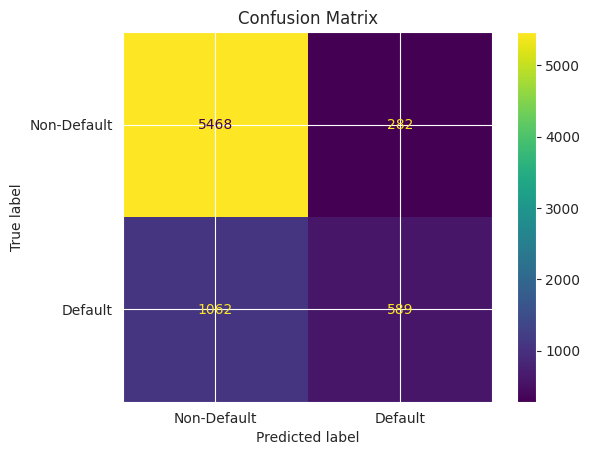

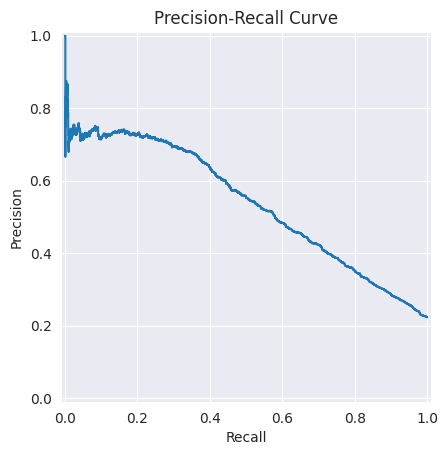

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

X_train_val = X_train_raw.copy()
X_test = X_test_raw.copy()

y_train_val = y_train_raw.copy()
y_test = y_test_raw.copy()

# 定义类别型变量列的索引
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# 将类别型变量转换为 category 类型，以便 XGBoost 识别
for feature in categorical_features:
    X_train_val[feature] = X_train_val[feature].astype('category')
    X_test[feature] = X_test[feature].astype('category')

# 从训练集中抽取一部分数据作为验证集
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# 创建 DMatrix 对象
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)  # 创建测试集的 DMatrix 对象

# 定义模型参数
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'enable_categorical': True,
}

# 训练模型，并使用验证集进行评估
evallist = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, evals=evallist)

# 预测
y_pred = model.predict(dtest)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
auc_score = roc_auc_score(y_test, y_pred)
precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred.round())

# 打印评估指标
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc_score}")

# 使用 ConfusionMatrixDisplay 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 使用 PrecisionRecallDisplay 绘制 PR 曲线
disp = PrecisionRecallDisplay(precision=precision_values, recall=recall_values)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
from collections import Counter
import numpy as np
from imblearn.over_sampling import SMOTENC

print("Dataset before resampling:")
print(sorted(Counter(y_train_raw).items()))

rng = np.random.RandomState(42)

smote_nc = SMOTENC(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], random_state=0)
X_train_raw_resampled, y_train_raw_resampled = smote_nc.fit_resample(X_train_raw, y_train_raw)
print("Dataset after resampling:")
print(sorted(Counter(y_train_raw_resampled).items()))
print()
print("SMOTE-NC will generate categories for the categorical features:")
print(X_train_raw_resampled[-5:])
print()

Dataset before resampling:
[(0, 17246), (1, 4954)]
Dataset after resampling:
[(0, 17246), (1, 17246)]

SMOTE-NC will generate categories for the categorical features:
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
34487      80695    2          1         2   26     -1     -1     -1     -1   
34488      58275    1          2         1   29      0      0      0     -2   
34489     153675    2          1         2   30      1     -2     -2     -2   
34490     112750    1          1         2   29      0      0      0      0   
34491      28948    1          3         1   62      0      0      0     -2   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
34487     -1  ...       4186       4317       3827       3184      2365   
34488     -2  ...          0          0          0          0      2086   
34489     -1  ...       -568      -1224        563       1092         0   
34490      0  ...     117783      97174      57518      49

[0]	train-logloss:0.62285	eval-logloss:0.62297
[1]	train-logloss:0.58293	eval-logloss:0.58434
[2]	train-logloss:0.55859	eval-logloss:0.56151
[3]	train-logloss:0.54208	eval-logloss:0.54600
[4]	train-logloss:0.53086	eval-logloss:0.53752
[5]	train-logloss:0.51944	eval-logloss:0.52834
[6]	train-logloss:0.50804	eval-logloss:0.51751
[7]	train-logloss:0.49971	eval-logloss:0.51280
[8]	train-logloss:0.49236	eval-logloss:0.50966
[9]	train-logloss:0.48194	eval-logloss:0.50128
Accuracy: 0.761924064315633
Recall: 0.532404603270745
Precision: 0.47030497592295345
F1 Score: 0.4994318181818182
AUC: 0.7509524662260028


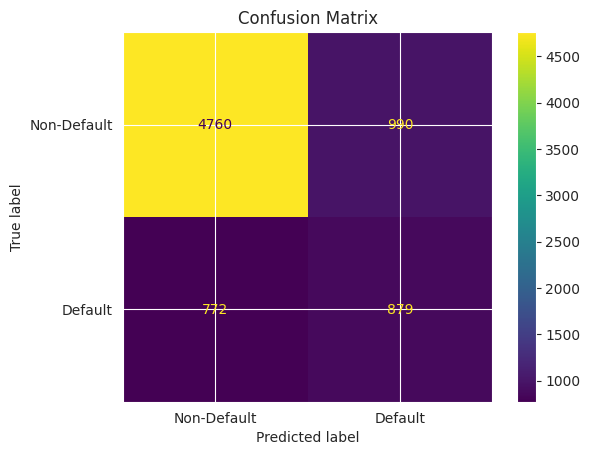

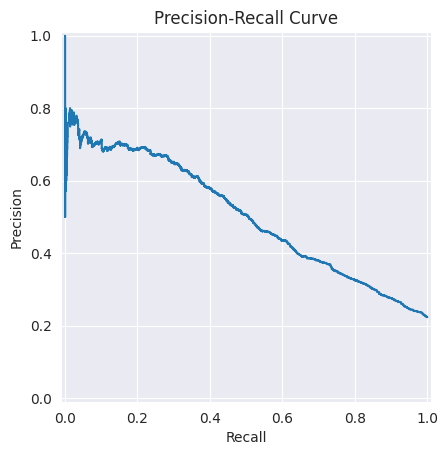

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


X_train_val = X_train_raw_resampled.copy()
X_test = X_test_raw.copy()

y_train_val = y_train_raw_resampled.copy()
y_test = y_test_raw.copy()

# 定义类别型变量列的索引
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# 将类别型变量转换为 category 类型，以便 XGBoost 识别
for feature in categorical_features:
    X_train_val[feature] = X_train_val[feature].astype('category')
    X_test[feature] = X_test[feature].astype('category')

# 从训练集中抽取一部分数据作为验证集
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# 创建 DMatrix 对象
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)  # 创建测试集的 DMatrix 对象

# 定义模型参数
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'enable_categorical': True,
}

# 训练模型，并使用验证集进行评估
evallist = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, evals=evallist)

# 预测
y_pred = model.predict(dtest)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
auc_score = roc_auc_score(y_test, y_pred)
precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred.round())

# 打印评估指标
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc_score}")

# 使用 ConfusionMatrixDisplay 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 使用 PrecisionRecallDisplay 绘制 PR 曲线
disp = PrecisionRecallDisplay(precision=precision_values, recall=recall_values)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
from collections import Counter
import numpy as np
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import GridSearchCV

print("Dataset before resampling:")
print(sorted(Counter(y_train_raw).items()))

# 定义要搜索的参数
param_grid = {
    'k_neighbors': [3, 5, 7],  # 邻居数量
    'sampling_strategy': ['minority', 'auto', 0.5, 1]  # 重采样策略
}

# 创建 SMOTENC 对象
smote_nc = SMOTENC(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], random_state=0)

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(smote_nc, param_grid, scoring='f1', cv=5)

# 执行网格搜索
grid_search.fit(X_train_raw, y_train_raw)

# 获取最佳参数
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# 使用最佳参数创建新的 SMOTENC 对象
best_smote_nc = SMOTENC(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], random_state=0, **best_params)

# 对数据进行重采样
X_train_raw_resampled, y_train_raw_resampled = best_smote_nc.fit_resample(X_train_raw, y_train_raw)

print("Dataset after resampling:")
print(sorted(Counter(y_train_raw_resampled).items()))
print()

Dataset before resampling:
[(0, 17246), (1, 4954)]
Best parameters: {'k_neighbors': 3, 'sampling_strategy': 'minority'}
Dataset after resampling:
[(0, 17246), (1, 17246)]



[0]	train-logloss:0.62424	eval-logloss:0.62771
[1]	train-logloss:0.58526	eval-logloss:0.59168
[2]	train-logloss:0.55833	eval-logloss:0.56779
[3]	train-logloss:0.54193	eval-logloss:0.55428
[4]	train-logloss:0.52877	eval-logloss:0.54288
[5]	train-logloss:0.51775	eval-logloss:0.53548
[6]	train-logloss:0.50766	eval-logloss:0.52771
[7]	train-logloss:0.49876	eval-logloss:0.52102
[8]	train-logloss:0.49073	eval-logloss:0.51678
[9]	train-logloss:0.48508	eval-logloss:0.51415
Accuracy: 0.7651668693419809
Recall: 0.5433070866141733
Precision: 0.4768740031897927
F1 Score: 0.5079275198187996
AUC: 0.7521249835409369


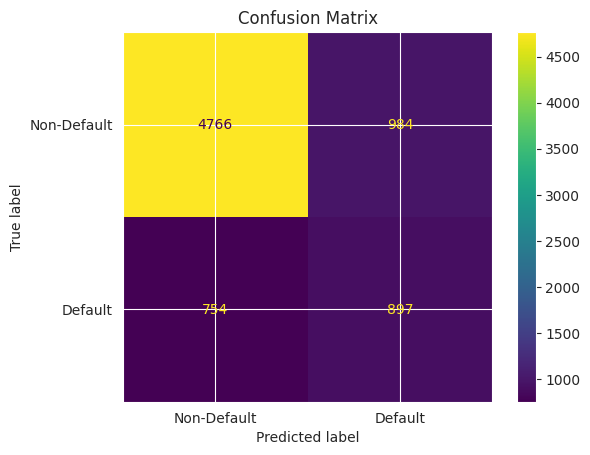

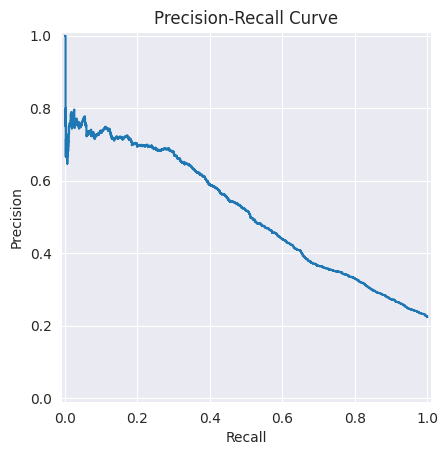

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


X_train_val = X_train_raw_resampled.copy()
X_test = X_test_raw.copy()

y_train_val = y_train_raw_resampled.copy()
y_test = y_test_raw.copy()

# 定义类别型变量列的索引
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# 将类别型变量转换为 category 类型，以便 XGBoost 识别
for feature in categorical_features:
    X_train_val[feature] = X_train_val[feature].astype('category')
    X_test[feature] = X_test[feature].astype('category')

# 从训练集中抽取一部分数据作为验证集
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# 创建 DMatrix 对象
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)  # 创建测试集的 DMatrix 对象

# 定义模型参数
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'enable_categorical': True,
}

# 训练模型，并使用验证集进行评估
evallist = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, evals=evallist)

# 预测
y_pred = model.predict(dtest)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
auc_score = roc_auc_score(y_test, y_pred)
precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred.round())

# 打印评估指标
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc_score}")

# 使用 ConfusionMatrixDisplay 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 使用 PrecisionRecallDisplay 绘制 PR 曲线
disp = PrecisionRecallDisplay(precision=precision_values, recall=recall_values)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
from collections import Counter
import numpy as np
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import GridSearchCV

print("Dataset before resampling:")
print(sorted(Counter(y_train_raw).items()))

# 定义要搜索的参数
param_grid = {
    'k_neighbors': [3, 5, 7],  # 邻居数量
    'sampling_strategy': [0.4, 0.5, 0.6]  # 重采样策略
}

# 创建 SMOTENC 对象
smote_nc = SMOTENC(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], random_state=0)

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(smote_nc, param_grid, scoring='f1', cv=5)

# 执行网格搜索
grid_search.fit(X_train_raw, y_train_raw)

# 获取最佳参数
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# 使用最佳参数创建新的 SMOTENC 对象
best_smote_nc = SMOTENC(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], random_state=0, **best_params)

# 对数据进行重采样
X_train_raw_resampled, y_train_raw_resampled = best_smote_nc.fit_resample(X_train_raw, y_train_raw)

print("Dataset after resampling:")
print(sorted(Counter(y_train_raw_resampled).items()))
print()

Dataset before resampling:
[(0, 17246), (1, 4954)]
Best parameters: {'k_neighbors': 3, 'sampling_strategy': 0.4}
Dataset after resampling:
[(0, 17246), (1, 6898)]



[0]	train-logloss:0.53718	eval-logloss:0.54897
[1]	train-logloss:0.50422	eval-logloss:0.52242
[2]	train-logloss:0.48551	eval-logloss:0.50892
[3]	train-logloss:0.47152	eval-logloss:0.50026
[4]	train-logloss:0.46148	eval-logloss:0.49512
[5]	train-logloss:0.45431	eval-logloss:0.49289
[6]	train-logloss:0.44740	eval-logloss:0.49139
[7]	train-logloss:0.44231	eval-logloss:0.49031
[8]	train-logloss:0.43532	eval-logloss:0.48845
[9]	train-logloss:0.42959	eval-logloss:0.48732
Accuracy: 0.8163761653830564
Recall: 0.3894609327680194
Precision: 0.6468812877263581
F1 Score: 0.48620037807183364
AUC: 0.771745240038975


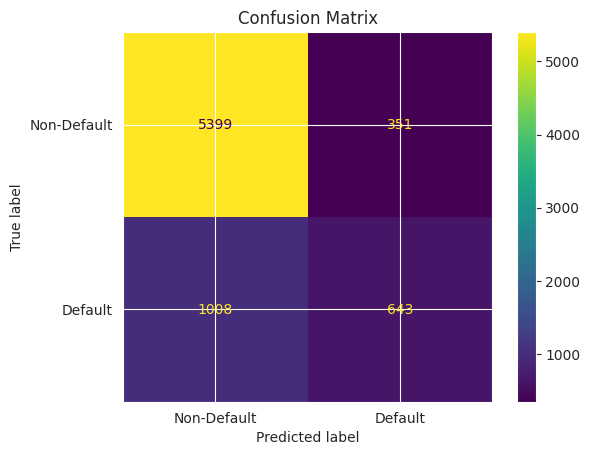

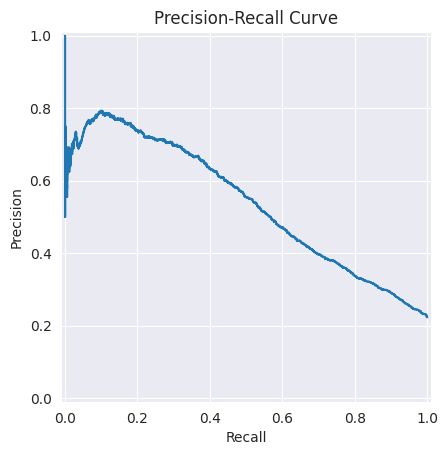

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


X_train_val = X_train_raw_resampled.copy()
X_test = X_test_raw.copy()

y_train_val = y_train_raw_resampled.copy()
y_test = y_test_raw.copy()

# 定义类别型变量列的索引
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# 将类别型变量转换为 category 类型，以便 XGBoost 识别
for feature in categorical_features:
    X_train_val[feature] = X_train_val[feature].astype('category')
    X_test[feature] = X_test[feature].astype('category')

# 从训练集中抽取一部分数据作为验证集
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# 创建 DMatrix 对象
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)  # 创建测试集的 DMatrix 对象

# 定义模型参数
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'enable_categorical': True,
}

# 训练模型，并使用验证集进行评估
evallist = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, evals=evallist)

# 预测
y_pred = model.predict(dtest)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
auc_score = roc_auc_score(y_test, y_pred)
precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred.round())

# 打印评估指标
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc_score}")

# 使用 ConfusionMatrixDisplay 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 使用 PrecisionRecallDisplay 绘制 PR 曲线
disp = PrecisionRecallDisplay(precision=precision_values, recall=recall_values)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
from collections import Counter
import numpy as np
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import GridSearchCV

print("Dataset before resampling:")
print(sorted(Counter(y_train_raw).items()))

# 定义要搜索的参数
param_grid = {
    'k_neighbors': [3, 5, 7],  # 邻居数量
    'sampling_strategy': [0.4, 0.5, 0.6]  # 重采样策略
}

# 创建 SMOTENC 对象
smote_nc = SMOTENC(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], random_state=0)

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(smote_nc, param_grid, scoring='f1', cv=5)

# 执行网格搜索
grid_search.fit(X_train_raw, y_train_raw)

# 获取最佳参数
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# 使用最佳参数创建新的 SMOTENC 对象
best_smote_nc = SMOTENC(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], random_state=0, **best_params)

# 对数据进行重采样
X_train_raw_resampled, y_train_raw_resampled = best_smote_nc.fit_resample(X_train_raw, y_train_raw)

print("Dataset after resampling:")
print(sorted(Counter(y_train_raw_resampled).items()))
print()

# 获取原始少数类样本的索引
original_minority_indices = np.where(y_train_raw_resampled[:len(y_train_raw)] == 1)[0]

# 获取生成少数类样本的索引
synthetic_minority_indices = np.where(y_train_raw_resampled[len(y_train_raw):] == 1)[0] + len(y_train_raw)

# 创建样本权重数组
sample_weights = np.ones(len(y_train_raw_resampled))

# 为原始少数类样本分配较大的权重 (例如 2)
sample_weights[original_minority_indices] = 2

# 为生成少数类样本分配较小的权重 (例如 0.5)
sample_weights[synthetic_minority_indices] = 0.5

Dataset before resampling:
[(0, 17246), (1, 4954)]
Best parameters: {'k_neighbors': 3, 'sampling_strategy': 0.4}
Dataset after resampling:
[(0, 17246), (1, 6898)]



[0]	train-logloss:0.60029	eval-logloss:0.61286
[1]	train-logloss:0.56280	eval-logloss:0.58393
[2]	train-logloss:0.53906	eval-logloss:0.56887
[3]	train-logloss:0.52229	eval-logloss:0.56018
[4]	train-logloss:0.51159	eval-logloss:0.55516
[5]	train-logloss:0.50290	eval-logloss:0.55266
[6]	train-logloss:0.49566	eval-logloss:0.55145
[7]	train-logloss:0.48885	eval-logloss:0.55043
[8]	train-logloss:0.48200	eval-logloss:0.55010
[9]	train-logloss:0.47551	eval-logloss:0.54999
Accuracy: 0.8077286853127955
Recall: 0.46032707450030286
Precision: 0.5882352941176471
F1 Score: 0.5164797825348284
AUC: 0.768332446738472


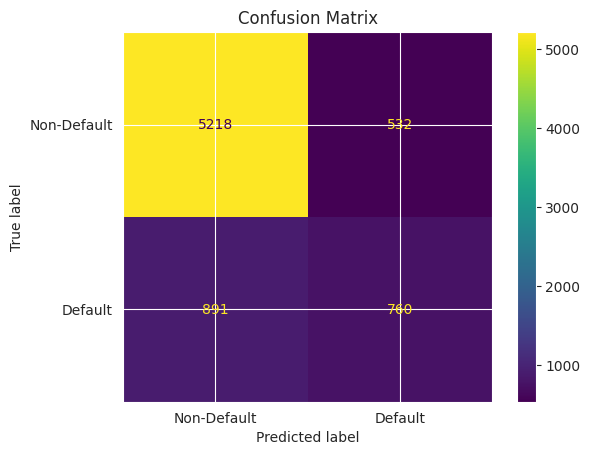

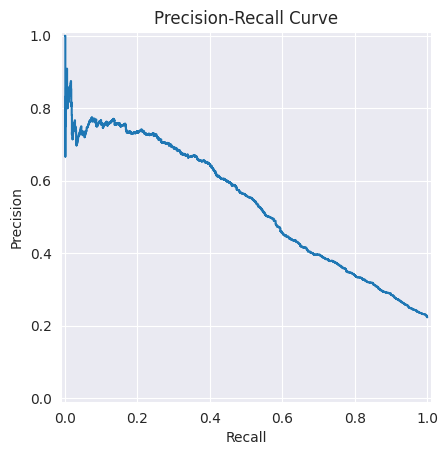

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


X_train_val = X_train_raw_resampled.copy()
X_test = X_test_raw.copy()

y_train_val = y_train_raw_resampled.copy()
y_test = y_test_raw.copy()

# 定义类别型变量列的索引
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# 将类别型变量转换为 category 类型，以便 XGBoost 识别
for feature in categorical_features:
    X_train_val[feature] = X_train_val[feature].astype('category')
    X_test[feature] = X_test[feature].astype('category')

# 从训练集中抽取一部分数据作为验证集
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# 创建 DMatrix 对象
dtrain = xgb.DMatrix(X_train, label=y_train, weight=sample_weights[X_train.index], enable_categorical=True)  # 传递样本权重
dval = xgb.DMatrix(X_val, label=y_val, weight=sample_weights[X_val.index], enable_categorical=True)  # 传递样本权重
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)  # 创建测试集的 DMatrix 对象

# 定义模型参数
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'enable_categorical': True,
}

# 训练模型，并使用验证集进行评估
evallist = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, evals=evallist)

# 预测
y_pred = model.predict(dtest)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
auc_score = roc_auc_score(y_test, y_pred)
precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred.round())

# 打印评估指标
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc_score}")

# 使用 ConfusionMatrixDisplay 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 使用 PrecisionRecallDisplay 绘制 PR 曲线
disp = PrecisionRecallDisplay(precision=precision_values, recall=recall_values)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
from collections import Counter
import numpy as np
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

print("Dataset before resampling:")
print(sorted(Counter(y_train_raw).items()))

# --- SMOTENC 参数调整 ---
# 定义要搜索的参数
param_grid = {
    'k_neighbors': [3, 5, 7],  # 邻居数量
    'sampling_strategy': [0.4, 0.5, 0.6]  # 重采样策略
}

# 创建 SMOTENC 对象
smote_nc = SMOTENC(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], random_state=0)

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(smote_nc, param_grid, scoring='f1', cv=5)

# 执行网格搜索
grid_search.fit(X_train_raw, y_train_raw)

# 获取最佳参数
best_params = grid_search.best_params_
print(f"Best parameters for SMOTENC: {best_params}")

# 使用最佳参数创建新的 SMOTENC 对象
best_smote_nc = SMOTENC(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], random_state=0, **best_params)

# --- SMOTENC 过采样 ---
X_resampled, y_resampled = best_smote_nc.fit_resample(X_train_raw, y_train_raw)

print("Dataset after SMOTENC oversampling:")
print(sorted(Counter(y_resampled).items()))
print()

# --- RandomUnderSampler 欠采样 ---
# 创建 RandomUnderSampler 对象
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=0)

# 对过采样后的数据进行欠采样
X_train_raw_resampled, y_train_raw_resampled = rus.fit_resample(X_resampled, y_resampled)

print("Dataset after RandomUnderSampler undersampling:")
print(sorted(Counter(y_train_raw_resampled).items()))
print()

Dataset before resampling:
[(0, 17246), (1, 4954)]
Best parameters for SMOTENC: {'k_neighbors': 3, 'sampling_strategy': 0.4}
Dataset after SMOTENC oversampling:
[(0, 17246), (1, 6898)]

Dataset after RandomUnderSampler undersampling:
[(0, 13796), (1, 6898)]



[0]	train-logloss:0.61760	eval-logloss:0.62825
[1]	train-logloss:0.57883	eval-logloss:0.59882
[2]	train-logloss:0.55289	eval-logloss:0.58409
[3]	train-logloss:0.53525	eval-logloss:0.57616
[4]	train-logloss:0.52370	eval-logloss:0.57091
[5]	train-logloss:0.51482	eval-logloss:0.56819
[6]	train-logloss:0.50642	eval-logloss:0.56703
[7]	train-logloss:0.49836	eval-logloss:0.56627
[8]	train-logloss:0.49142	eval-logloss:0.56645
[9]	train-logloss:0.48565	eval-logloss:0.56699
Accuracy: 0.7886772057830023
Recall: 0.5378558449424591
Precision: 0.5257548845470693
F1 Score: 0.5317365269461077
AUC: 0.7709371395465198


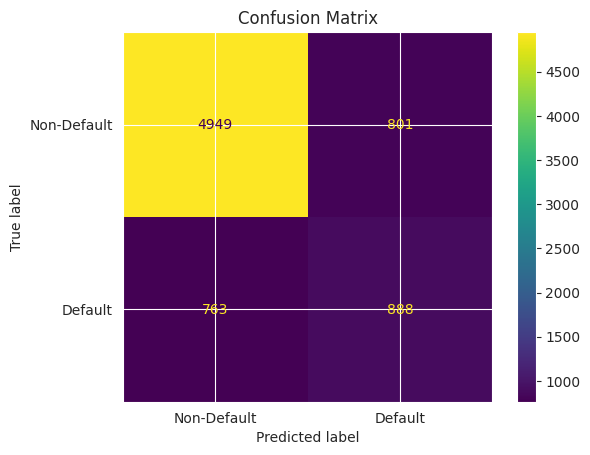

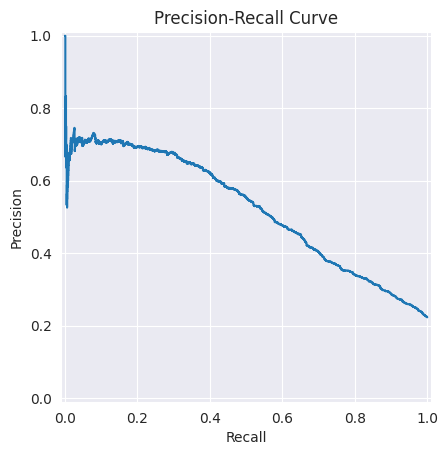

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


X_train_val = X_train_raw_resampled.copy()
X_test = X_test_raw.copy()

y_train_val = y_train_raw_resampled.copy()
y_test = y_test_raw.copy()

# 定义类别型变量列的索引
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# 将类别型变量转换为 category 类型，以便 XGBoost 识别
for feature in categorical_features:
    X_train_val[feature] = X_train_val[feature].astype('category')
    X_test[feature] = X_test[feature].astype('category')

# 从训练集中抽取一部分数据作为验证集
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# 创建 DMatrix 对象
dtrain = xgb.DMatrix(X_train, label=y_train, weight=sample_weights[X_train.index], enable_categorical=True)  # 传递样本权重
dval = xgb.DMatrix(X_val, label=y_val, weight=sample_weights[X_val.index], enable_categorical=True)  # 传递样本权重
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)  # 创建测试集的 DMatrix 对象

# 定义模型参数
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'enable_categorical': True,
}

# 训练模型，并使用验证集进行评估
evallist = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, evals=evallist)

# 预测
y_pred = model.predict(dtest)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
auc_score = roc_auc_score(y_test, y_pred)
precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred.round())

# 打印评估指标
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc_score}")

# 使用 ConfusionMatrixDisplay 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 使用 PrecisionRecallDisplay 绘制 PR 曲线
disp = PrecisionRecallDisplay(precision=precision_values, recall=recall_values)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[80]	valid_0's binary_logloss: 0.5521
Accuracy: 0.7880016214025132
Recall: 0.5741974560872198
Precision: 0.5226019845644984
F1 Score: 0.5471861471861472
AUC: 0.7844822900481921


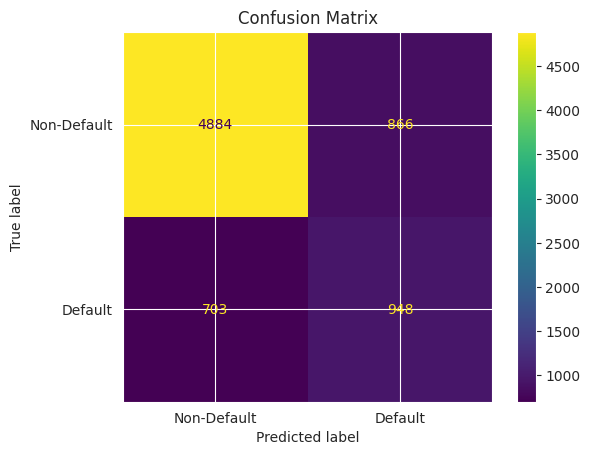

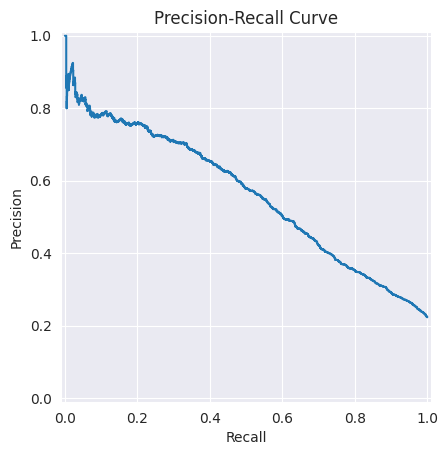

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

X_train_val = X_train_raw_resampled.copy()
X_test = X_test_raw.copy()

y_train_val = y_train_raw_resampled.copy()
y_test = y_test_raw.copy()

# 定义类别型变量列的索引
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# 将类别型变量转换为 category 类型，以便 LightGBM 识别
for feature in categorical_features:
    X_train_val[feature] = X_train_val[feature].astype('category')
    X_test[feature] = X_test[feature].astype('category')

# 从训练集中抽取一部分数据作为验证集
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# 创建 Dataset 对象
train_data = lgb.Dataset(X_train, label=y_train, weight=sample_weights[X_train.index], categorical_feature=categorical_features)
val_data = lgb.Dataset(X_val, label=y_val, weight=sample_weights[X_val.index], categorical_feature=categorical_features)

# 定义模型参数
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# 训练模型，并使用验证集进行评估
# 使用 valid_sets 和 callbacks 参数实现 early stopping
model = lgb.train(params,
                train_data,
                num_boost_round=100,
                valid_sets=[val_data],
                #early_stopping_rounds=10)
                callbacks=[lgb.early_stopping(10)])  # 使用 lgb.early_stopping 回调函数实现 early stopping

# 预测
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
auc_score = roc_auc_score(y_test, y_pred)
precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred.round())


# 打印评估指标
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc_score}")

# 使用 ConfusionMatrixDisplay 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 使用 PrecisionRecallDisplay 绘制 PR 曲线
disp = PrecisionRecallDisplay(precision=precision_values, recall=recall_values)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
df['GRAD_SCHOOL'] = (df['EDUCATION'] == 1).astype('category') # 创建GRAD_SCHOOL列，如果EDUCATION列为1，则为True，否则为False，并转换为category类型
df['UNIVERSITY'] = (df['EDUCATION'] == 2).astype('category') # 创建UNIVERSITY列，如果EDUCATION列为2，则为True，否则为False，并转换为category类型
df['HIGH_SCHOOL'] = (df['EDUCATION'] == 3).astype('category') # 创建HIGH_SCHOOL列，如果EDUCATION列为3，则为True，否则为False，并转换为category类型
df.drop('EDUCATION', axis=1, inplace=True) # 删除EDUCATION列

df['MALE'] = (df['SEX'] == 1).astype('category') # 创建MALE列，如果SEX列为1，则为True，否则为False，并转换为category类型
df.drop('SEX', axis=1, inplace=True) # 删除SEX列

df['MARRIED'] = (df['MARRIAGE'] == 1).astype('category') # 创建MARRIED列，如果MARRIAGE列为1，则为True，否则为False，并转换为category类型
df.drop('MARRIAGE', axis=1, inplace=True) # 删除MARRIAGE列

df.head() # 显示数据框的前几行

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,False,True,False,False,True
2,120000,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,False,True,False,False,False
3,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,0,False,True,False,False,False
4,50000,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,0,False,True,False,False,True
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,10000,9000,689,679,0,False,True,False,True,True
